### Import the needed package

In [41]:
# package to get the custom modules
import sys
# package to handle the environment variables
from dotenv import load_dotenv
# get the custom modules
sys.path.insert(0, './../')
# load the environment variables
load_dotenv()
# package to handle files
import os
# the custom modules
import utilities as utils
# package to handle arrays
import numpy as np
# package to handle data visualization
import matplotlib.pyplot as plt
# package to handle random numbers
from random import randint


### Global variable

In [42]:
# main path
path_full = os.environ.get("ORI_PATH")
# path where the datasets are stored
path_dataset_ori = os.path.join(path_full, "datasets", "splitted", "original")
path_dataset_aug = os.path.join(path_full, "datasets", "splitted", "augmented")
path_test_ori = os.path.join(path_dataset_ori, "test")
path_test_aug = os.path.join(path_dataset_aug, "test")
# path where the model are stored
path_model = os.path.join(path_full, "data", "model")

### Get dataset

In [43]:
# get the image and mask files
test_ori_img, test_ori_mask = utils.load_img_mask(path_test_ori)
test_aug_img, test_aug_mask = utils.load_img_mask(path_test_aug)
# create the tf dataset
testset_ori = utils.create_dataset(test_ori_img, test_ori_mask)
testset_aug = utils.create_dataset(test_aug_img, test_aug_mask)

### Test the model

In [44]:
pred_unet_mask_ori, unet_model_ori = utils.predict_model(testset_ori, path_model, "unet_model_ori")
print("Unet model ori done")
pred_unet_mask_aug, unet_model_aug = utils.predict_model(testset_aug, path_model, "unet_model_aug")
print("Unet model aug done")
pred_mnet_mask_ori, mnet_model_ori = utils.predict_model(testset_ori, path_model, "mnet_model_ori")
print("Mnet model ori done")
pred_mnet_mask_aug, mnet_model_aug = utils.predict_model(testset_aug, path_model, "mnet_model_aug")
print("Mnet model aug done")
pred_efnet_mask_ori, efnet_model_ori = utils.predict_model(testset_ori, path_model, "efnet_model_ori")
print("Efnet model ori done")
pred_efnet_mask_aug, efnet_model_aug = utils.predict_model(testset_aug, path_model, "efnet_model_aug")
print("Efnet model aug done")

1/1 [==============================] - 0s 384ms/step
Unet model ori done
1/1 [==============================] - 0s 306ms/step
Unet model aug done
1/1 [==============================] - 1s 1s/step
Mnet model ori done
1/1 [==============================] - 1s 811ms/step
Mnet model aug done
1/1 [==============================] - 4s 4s/step
Efnet model ori done
1/1 [==============================] - 5s 5s/step
Efnet model aug done


### Check the treshold

Distribution of the predicted mask value (could show the rought estimation of the threshold)


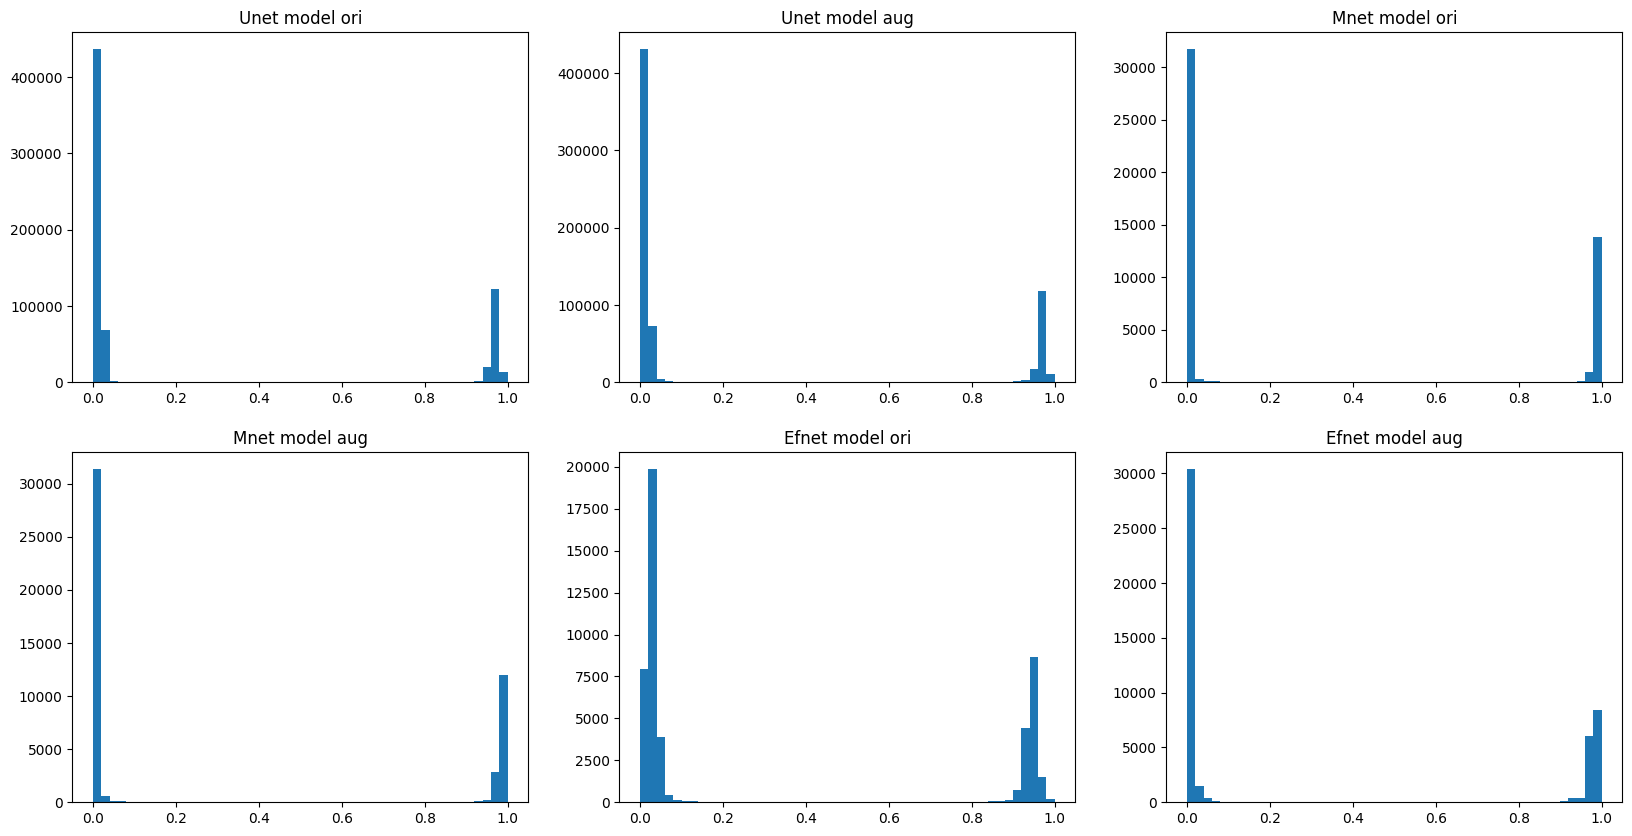

In [45]:
bin_count = 50
print("Distribution of the predicted mask value (could show the rought estimation of the threshold)")

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.hist(np.unique(pred_unet_mask_ori), bins=bin_count)
plt.title("Unet model ori")
plt.subplot(2, 3, 2)
plt.hist(np.unique(pred_unet_mask_aug), bins=bin_count)
plt.title("Unet model aug")

plt.subplot(2, 3, 3)
plt.hist(np.unique(pred_mnet_mask_ori), bins=bin_count)
plt.title("Mnet model ori")
plt.subplot(2, 3, 4)
plt.hist(np.unique(pred_mnet_mask_aug), bins=bin_count)
plt.title("Mnet model aug")

plt.subplot(2, 3, 5)
plt.hist(np.unique(pred_efnet_mask_ori), bins=bin_count)
plt.title("Efnet model ori")
plt.subplot(2, 3, 6)
plt.hist(np.unique(pred_efnet_mask_aug), bins=bin_count)
plt.title("Efnet model aug")

plt.show()

### Split the disc and cup mask

In [46]:
treshold = .5

Unet model ori predicted mask


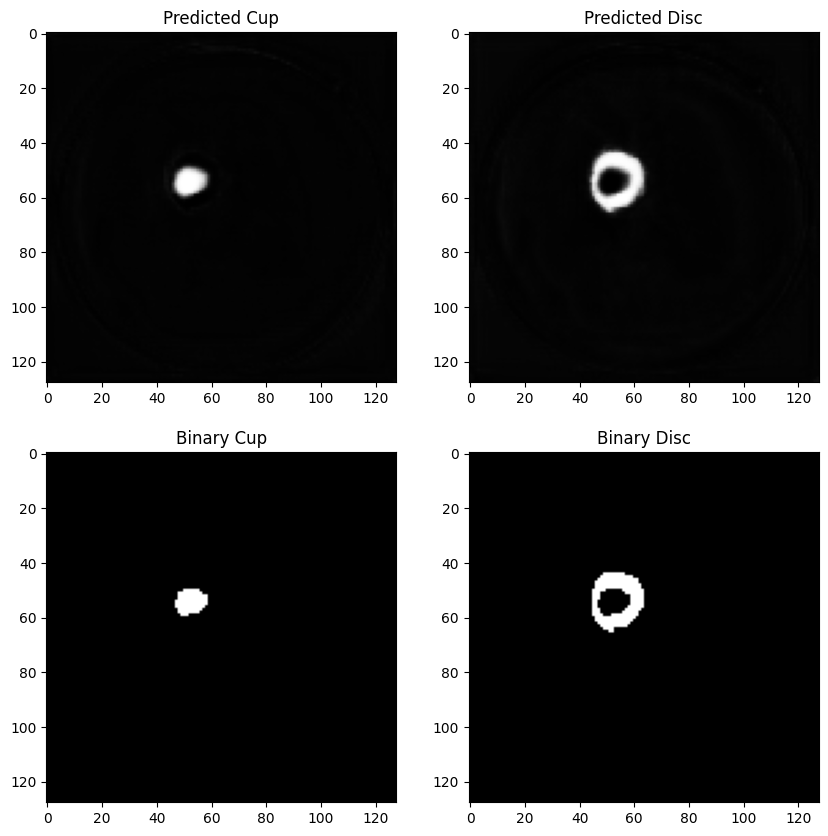

In [47]:
print("Unet model ori predicted mask")
unet_cup_mask_ori, unet_disc_mask_ori, unet_bcup_mask_ori, unet_bdisc_mask_ori = utils.split_disc_cup_mask(pred_unet_mask_ori, treshold)

Unet model aug predicted mask


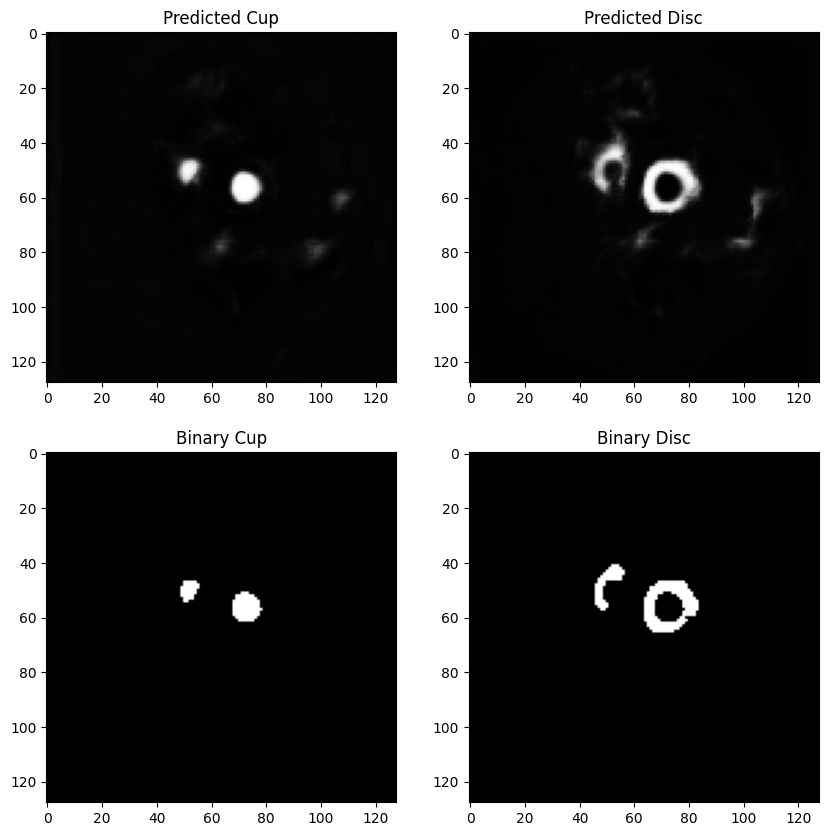

In [48]:
print("Unet model aug predicted mask")
unet_cup_mask_aug, unet_disc_mask_aug, unet_bcup_mask_aug, unet_bdisc_mask_aug = utils.split_disc_cup_mask(pred_unet_mask_aug, treshold)

Mnet model ori predicted mask


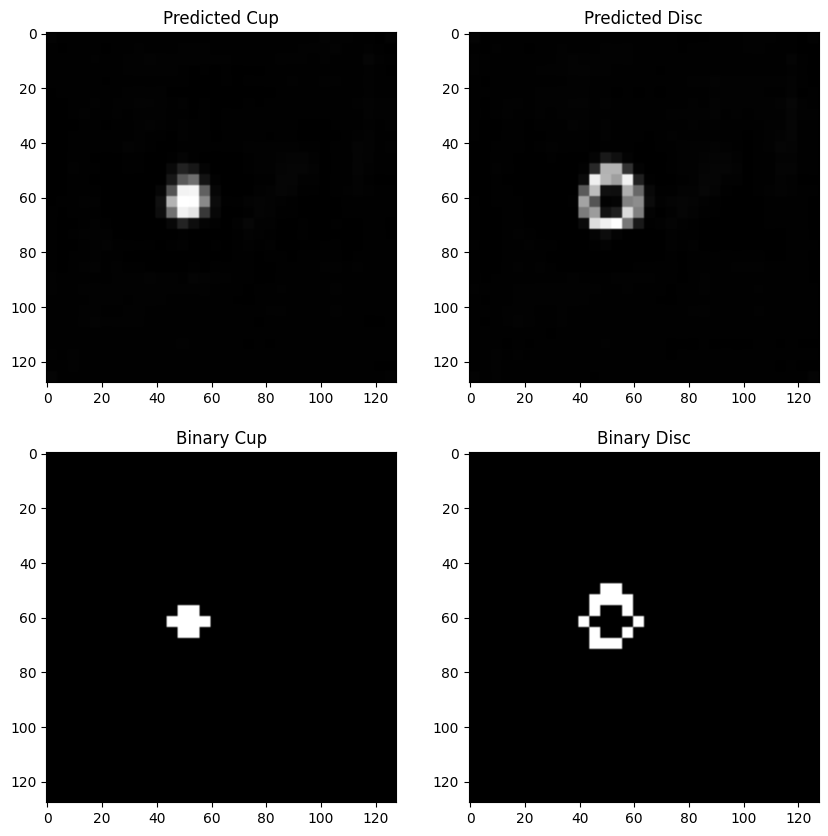

In [49]:
print("Mnet model ori predicted mask")
mnet_cup_mask_ori, mnet_disc_mask_ori, mnet_bcup_mask_ori, mnet_bdisc_mask_ori = utils.split_disc_cup_mask(pred_mnet_mask_ori, treshold)

Mnet model aug predicted mask


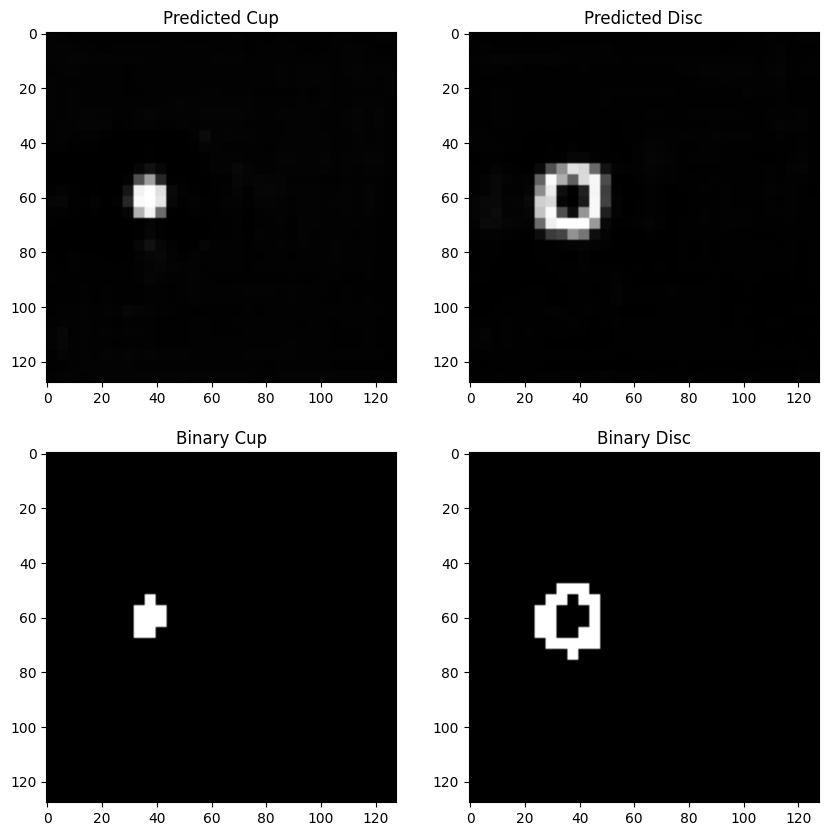

In [50]:
print("Mnet model aug predicted mask")
mnet_cup_mask_aug, mnet_disc_mask_aug, mnet_bcup_mask_aug, mnet_bdisc_mask_aug = utils.split_disc_cup_mask(pred_mnet_mask_aug, treshold)

Efnet model ori predicted mask


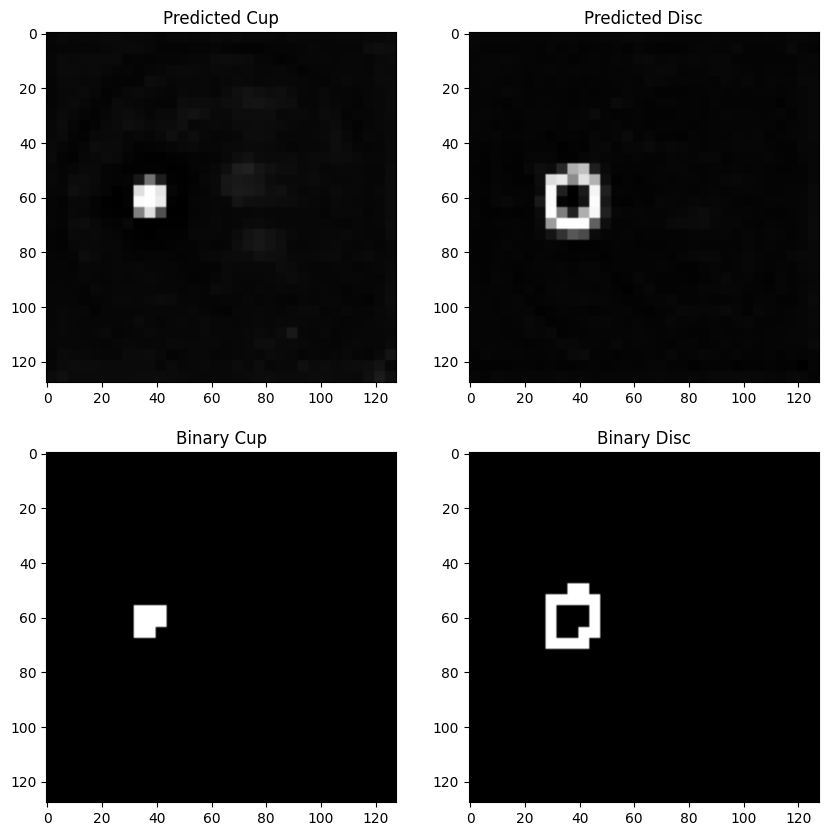

In [51]:
print("Efnet model ori predicted mask")
efnet_cup_mask_ori, efnet_disc_mask_ori, efnet_bcup_mask_ori, efnet_bdisc_mask_ori = utils.split_disc_cup_mask(pred_efnet_mask_ori, treshold)

Efnet model aug predicted mask


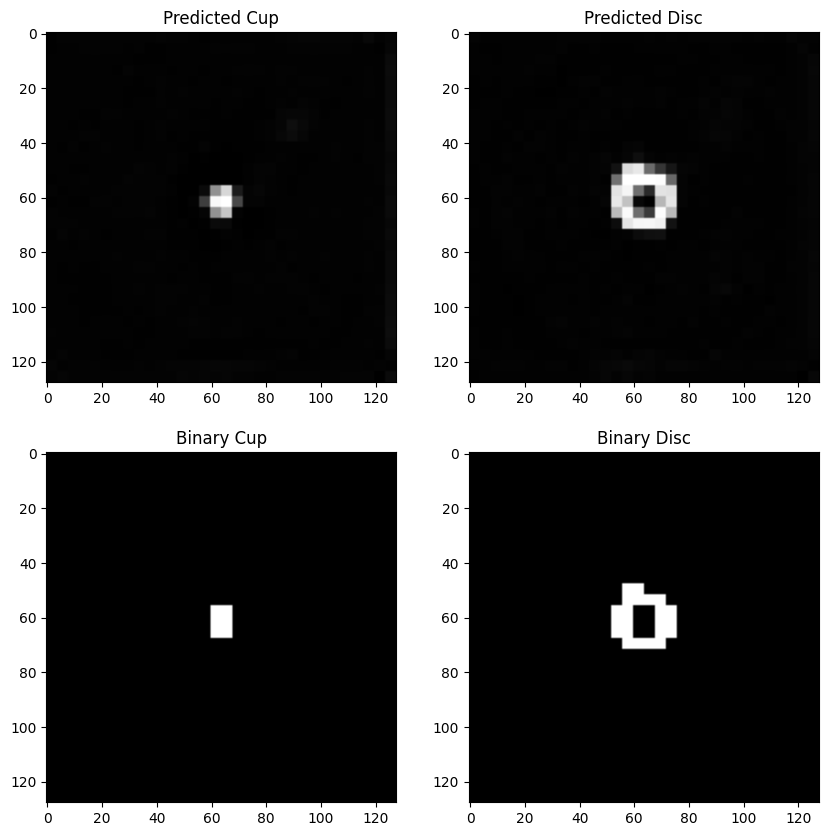

In [52]:
print("Efnet model aug predicted mask")
efnet_cup_mask_aug, efnet_disc_mask_aug, efnet_bcup_mask_aug, efnet_bdisc_mask_aug = utils.split_disc_cup_mask(pred_efnet_mask_aug, treshold)

### Visualize the test and predicted image

Unet model ori visualization


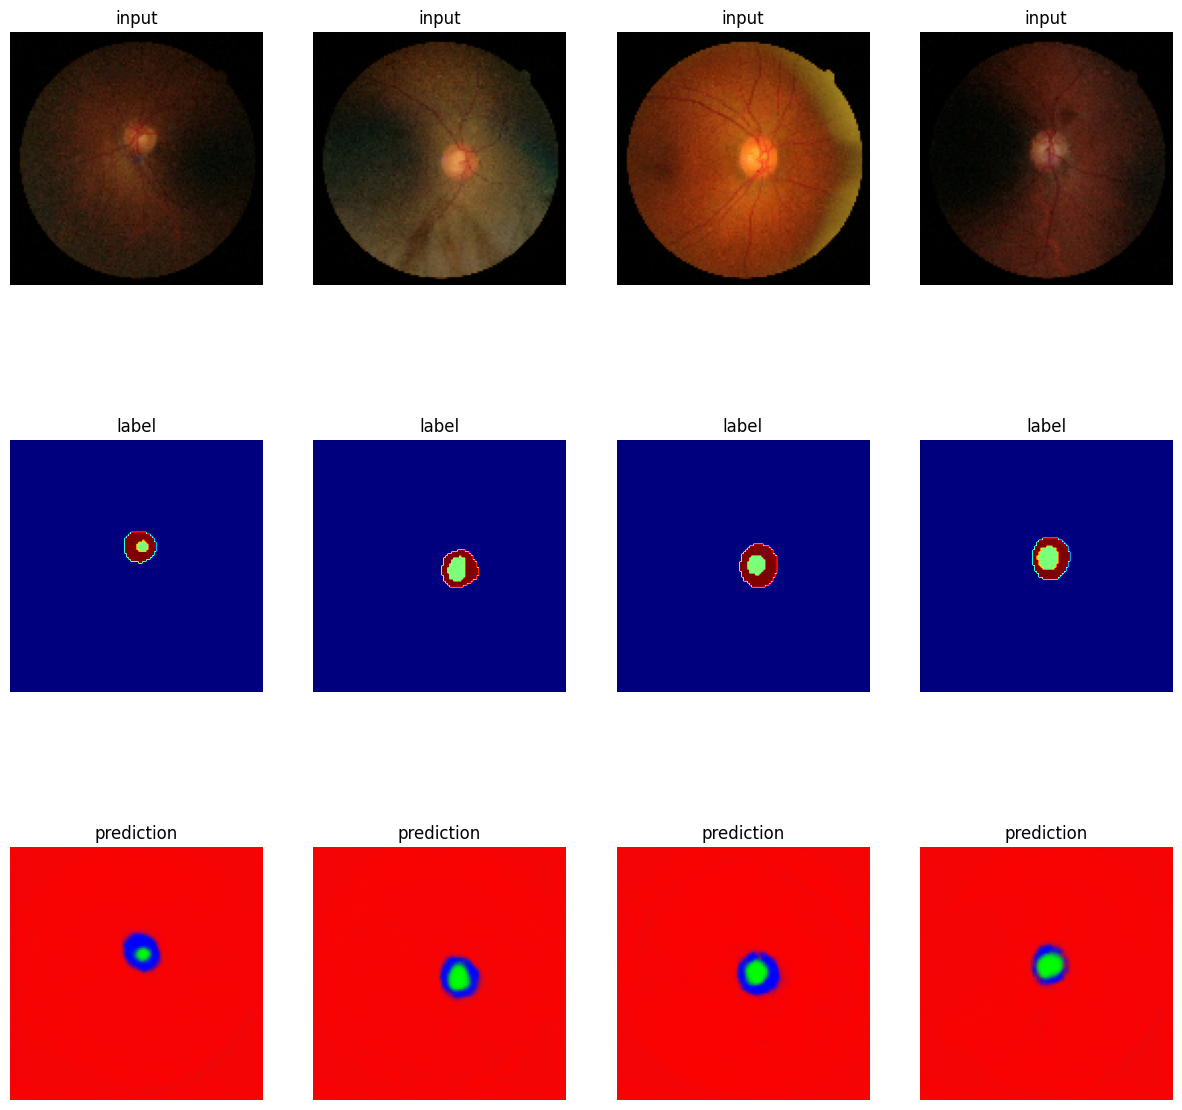

In [53]:
print("Unet model ori visualization")
utils.visualize_pred_mask(testset_ori, unet_model_ori, 4)

Unet model aug visualization


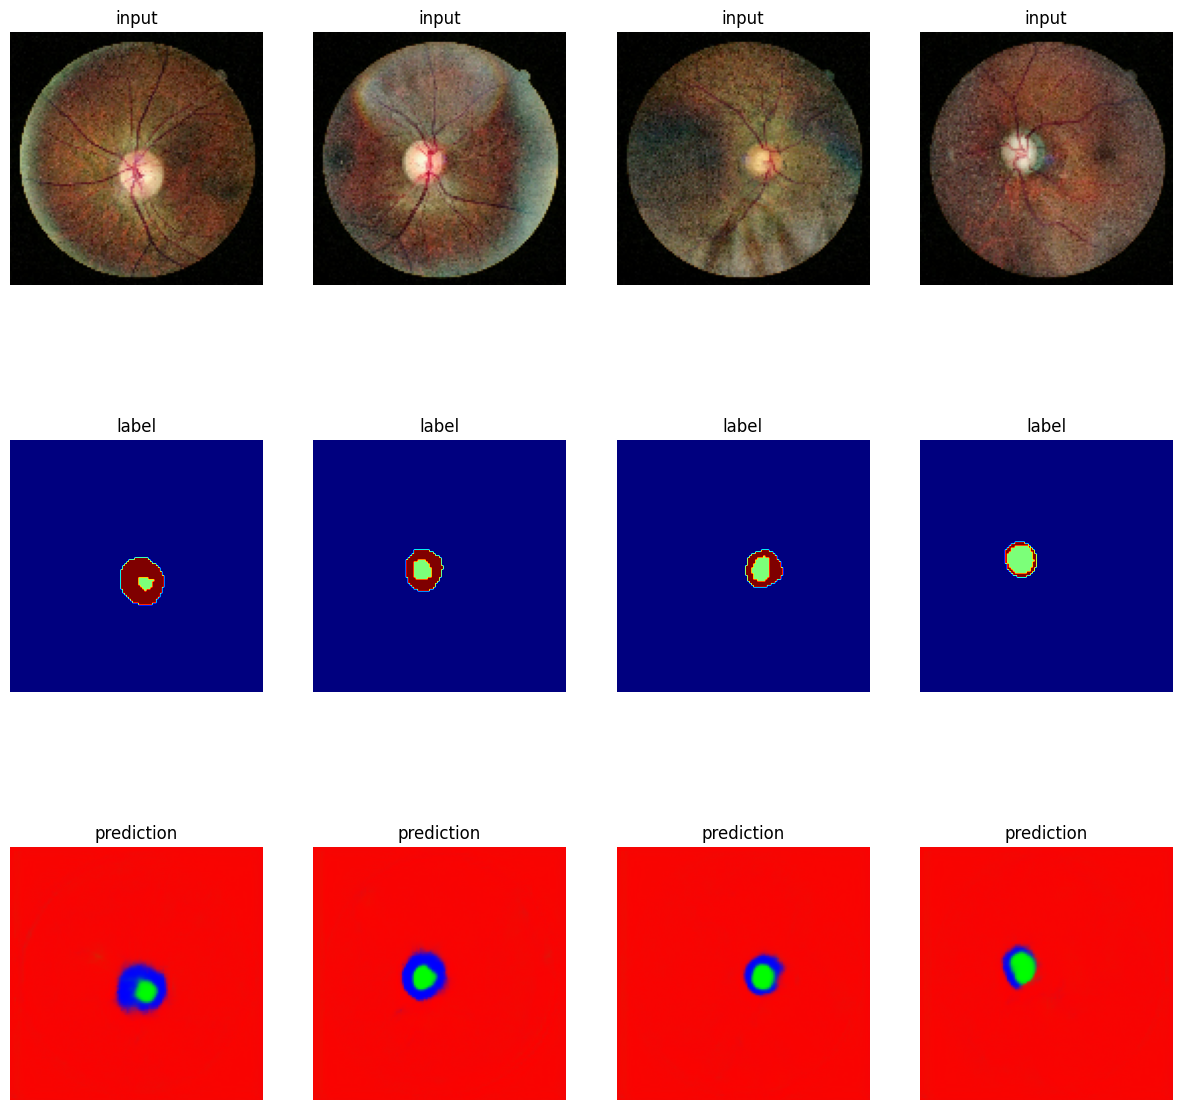

In [54]:
print("Unet model aug visualization")
utils.visualize_pred_mask(testset_aug, unet_model_aug, 4)

Mnet model ori visualization


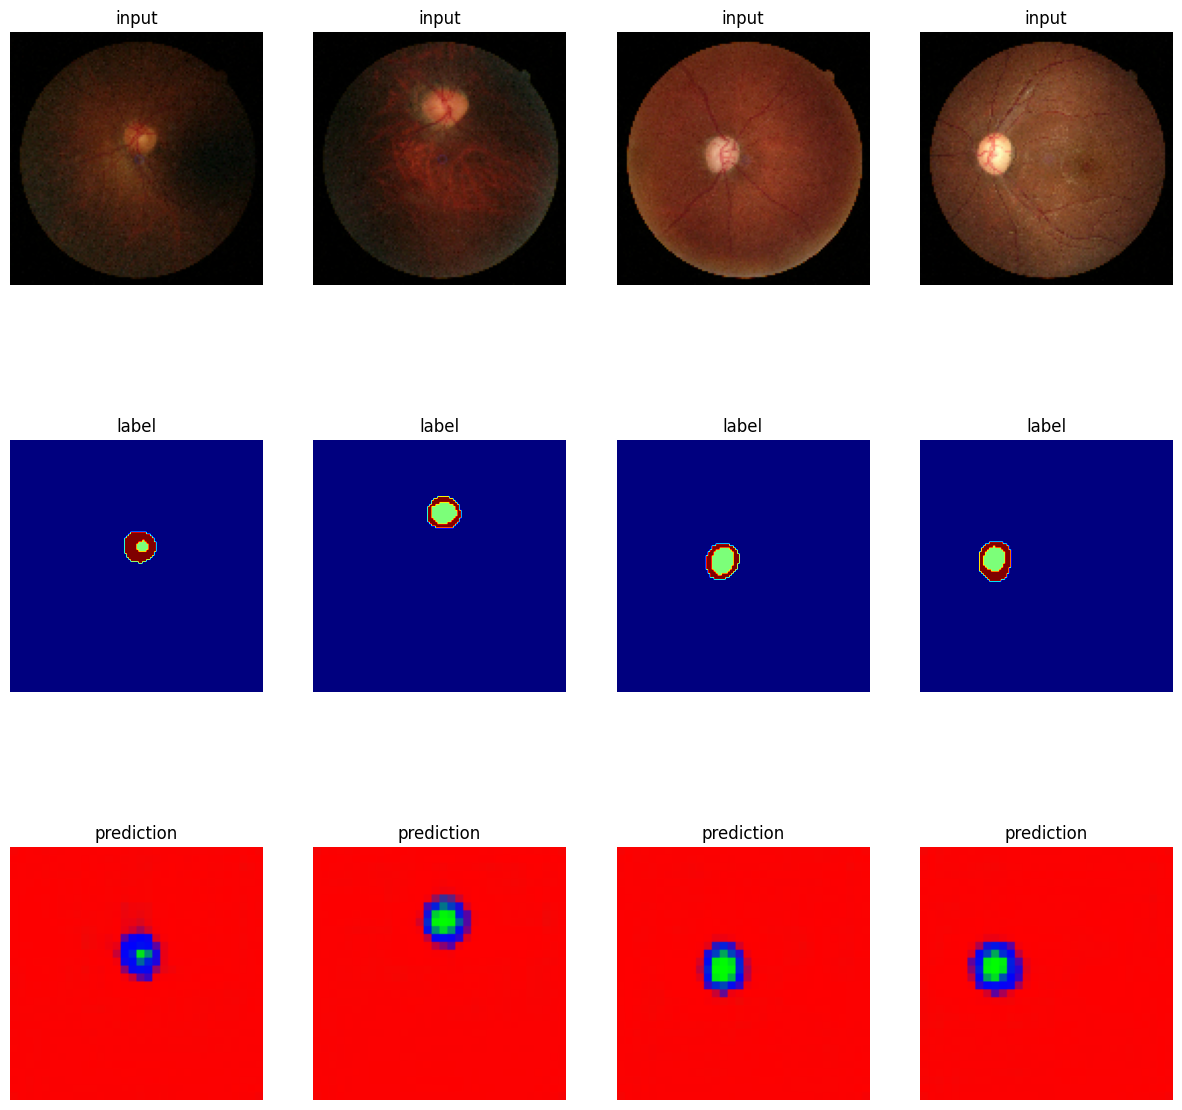

In [55]:
print("Mnet model ori visualization")
utils.visualize_pred_mask(testset_ori, mnet_model_ori, 4)

Mnet model aug visualization


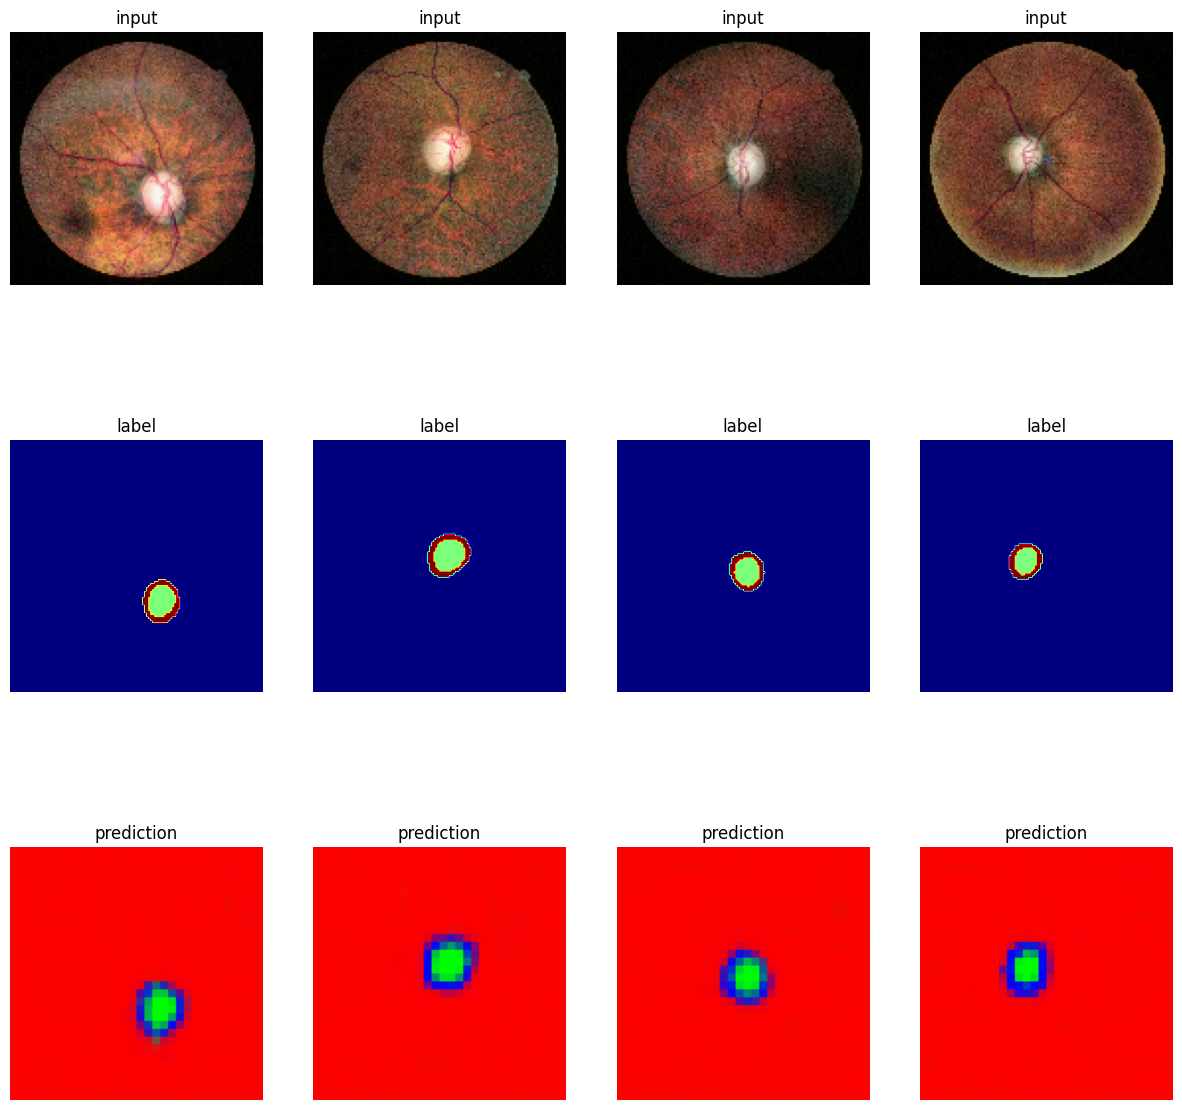

In [56]:
print("Mnet model aug visualization")
utils.visualize_pred_mask(testset_aug, mnet_model_aug, 4)

Efnet model ori visualization


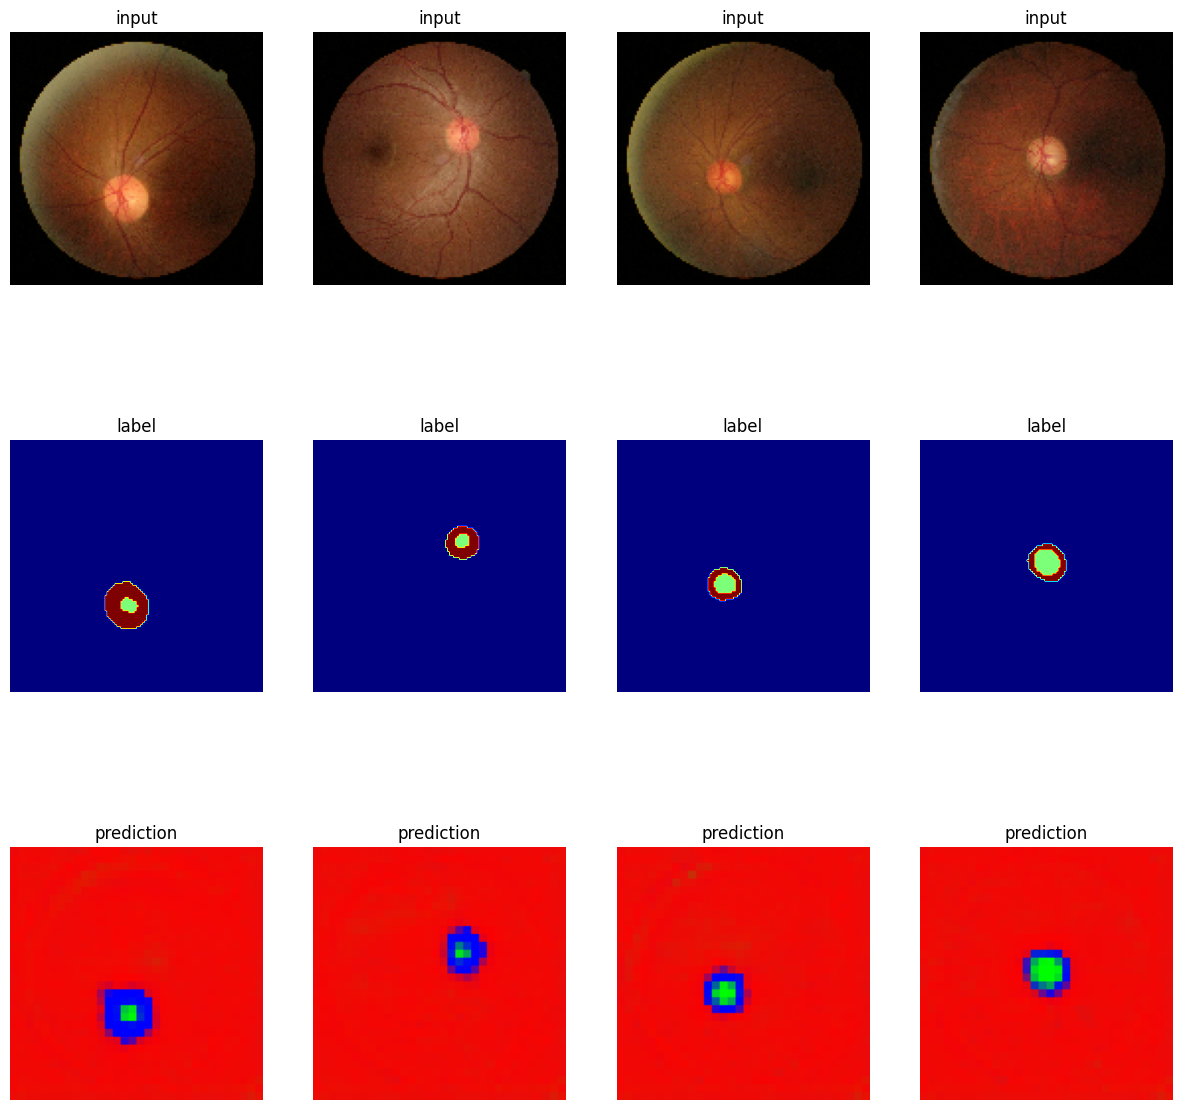

In [57]:
print("Efnet model ori visualization")
utils.visualize_pred_mask(testset_ori, efnet_model_ori, 4)

Efnet model aug visualization


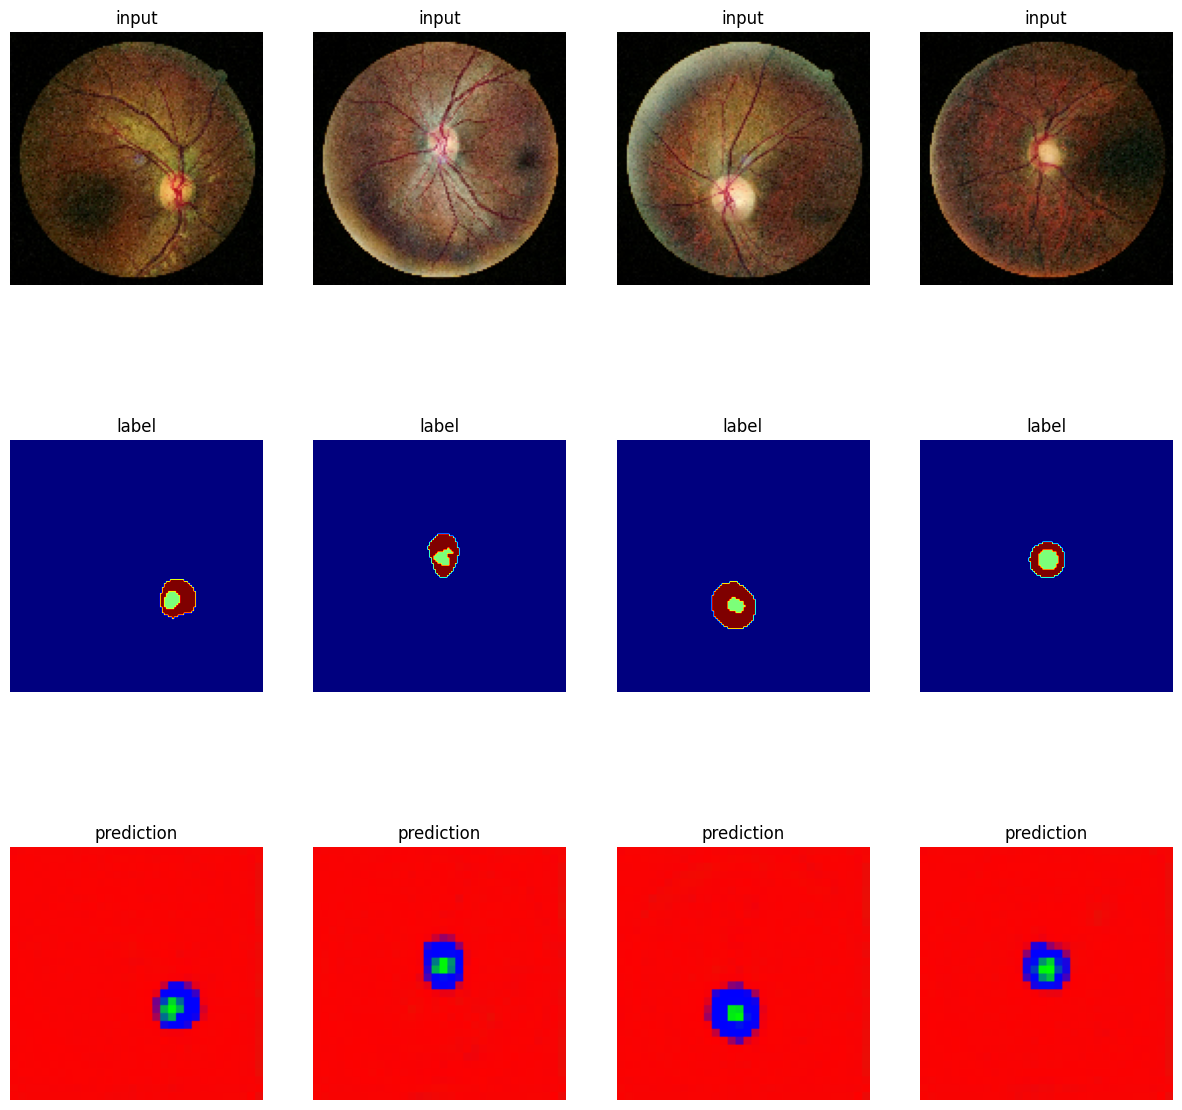

In [58]:
print("Efnet model aug visualization")
utils.visualize_pred_mask(testset_aug, efnet_model_aug, 4)

### Calculate the CDR value

In [59]:
idx = randint(0, len(testset_ori)-1)

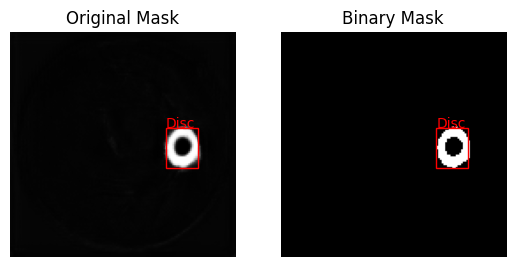

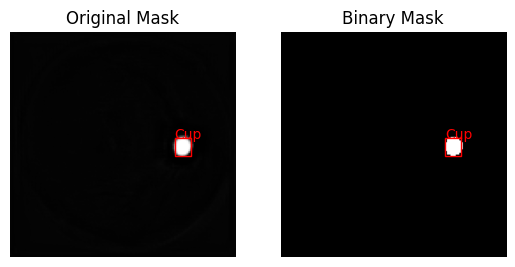

The CDR value for Unet model ori
cup_area: 86
disc_area: 248
acdr: 0.3467741935483871
h_cdr: 0.5263157894736842
v_cdr: 0.4583333333333333
bounding box value {'d_ymin': 54, 'd_ymax': 77, 'd_xmin': 88, 'd_xmax': 106, 'd_height': 24, 'd_width': 19, 'c_ymin': 60, 'c_ymax': 70, 'c_xmin': 93, 'c_xmax': 102, 'c_height': 11, 'c_width': 10}


In [60]:
cdr_result = utils.calculate_area_CDR(unet_cup_mask_ori[idx], unet_disc_mask_ori[idx], unet_bcup_mask_ori[idx], unet_bdisc_mask_ori[idx])
print("The CDR value for Unet model ori")
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

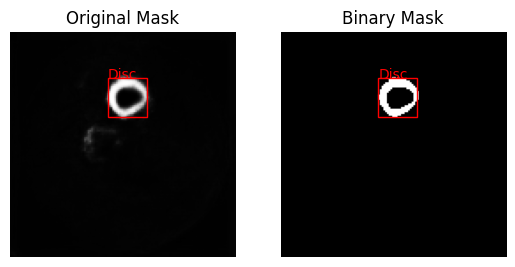

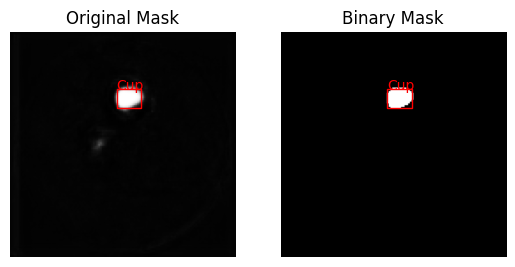

The CDR value for Unet model aug
cup_area: 145
disc_area: 226
acdr: 0.6415929203539823
h_cdr: 0.6521739130434783
v_cdr: 0.5217391304347826
bounding box value {'d_ymin': 26, 'd_ymax': 48, 'd_xmin': 55, 'd_xmax': 77, 'd_height': 23, 'd_width': 23, 'c_ymin': 32, 'c_ymax': 43, 'c_xmin': 60, 'c_xmax': 74, 'c_height': 12, 'c_width': 15}


In [61]:
cdr_result = utils.calculate_area_CDR(unet_cup_mask_aug[idx], unet_disc_mask_aug[idx], unet_bcup_mask_aug[idx], unet_bdisc_mask_aug[idx])
print("The CDR value for Unet model aug")
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

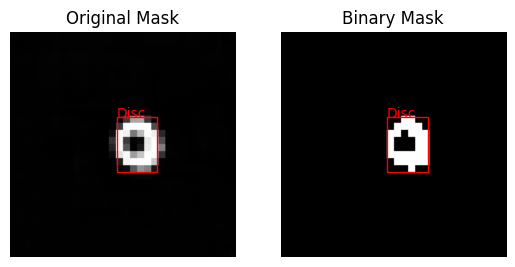

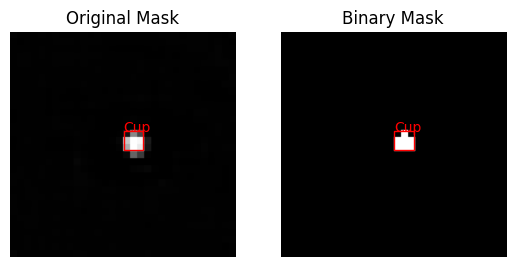

The CDR value for Mnet model ori
cup_area: 112
disc_area: 464
acdr: 0.2413793103448276
h_cdr: 0.5
v_cdr: 0.375
bounding box value {'d_ymin': 48, 'd_ymax': 79, 'd_xmin': 60, 'd_xmax': 83, 'd_height': 32, 'd_width': 24, 'c_ymin': 56, 'c_ymax': 67, 'c_xmin': 64, 'c_xmax': 75, 'c_height': 12, 'c_width': 12}


In [62]:
cdr_result = utils.calculate_area_CDR(mnet_cup_mask_ori[idx], mnet_disc_mask_ori[idx], mnet_bcup_mask_ori[idx], mnet_bdisc_mask_ori[idx])
print("The CDR value for Mnet model ori")
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

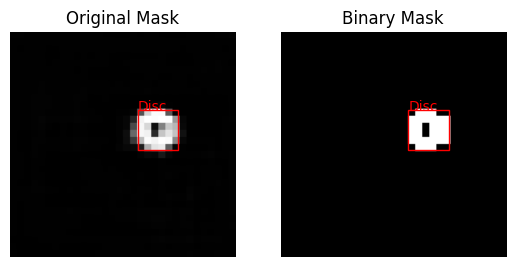

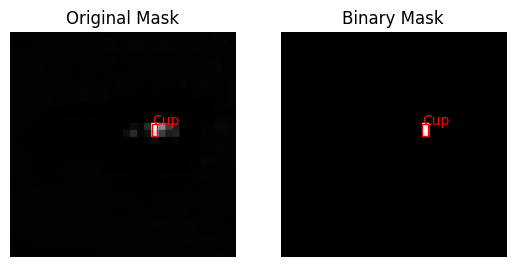

The CDR value for Mnet model aug
cup_area: 32
disc_area: 448
acdr: 0.07142857142857142
h_cdr: 0.16666666666666666
v_cdr: 0.3333333333333333
bounding box value {'d_ymin': 44, 'd_ymax': 67, 'd_xmin': 72, 'd_xmax': 95, 'd_height': 24, 'd_width': 24, 'c_ymin': 52, 'c_ymax': 59, 'c_xmin': 80, 'c_xmax': 83, 'c_height': 8, 'c_width': 4}


In [63]:
cdr_result = utils.calculate_area_CDR(mnet_cup_mask_aug[idx], mnet_disc_mask_aug[idx], mnet_bcup_mask_aug[idx], mnet_bdisc_mask_aug[idx])
print("The CDR value for Mnet model aug")
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

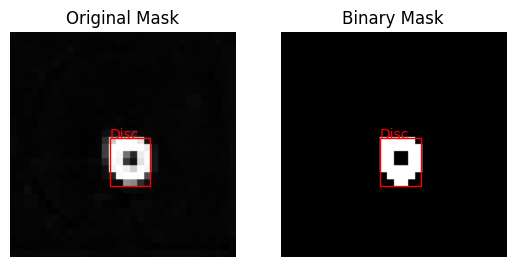

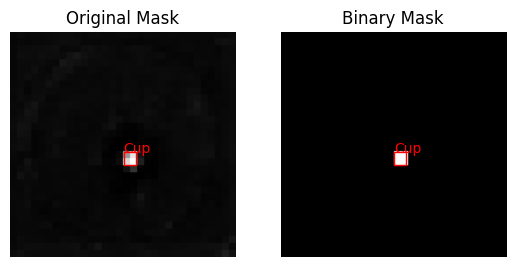

The CDR value for Efnet model ori
cup_area: 64
disc_area: 496
acdr: 0.12903225806451613
h_cdr: 0.3333333333333333
v_cdr: 0.2857142857142857
bounding box value {'d_ymin': 60, 'd_ymax': 87, 'd_xmin': 56, 'd_xmax': 79, 'd_height': 28, 'd_width': 24, 'c_ymin': 68, 'c_ymax': 75, 'c_xmin': 64, 'c_xmax': 71, 'c_height': 8, 'c_width': 8}


In [64]:
cdr_result = utils.calculate_area_CDR(efnet_cup_mask_ori[idx], efnet_disc_mask_ori[idx], efnet_bcup_mask_ori[idx], efnet_bdisc_mask_ori[idx])
print("The CDR value for Efnet model ori")
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

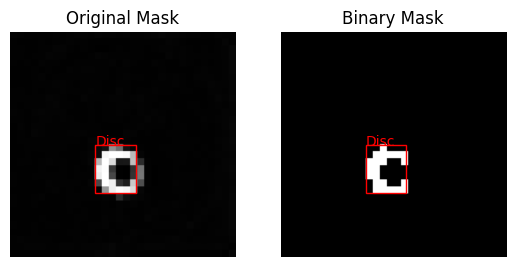

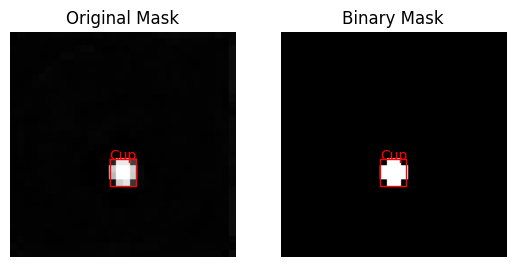

The CDR value for Efnet model aug
cup_area: 192
disc_area: 352
acdr: 0.5454545454545454
h_cdr: 0.6666666666666666
v_cdr: 0.5714285714285714
bounding box value {'d_ymin': 64, 'd_ymax': 91, 'd_xmin': 48, 'd_xmax': 71, 'd_height': 28, 'd_width': 24, 'c_ymin': 72, 'c_ymax': 87, 'c_xmin': 56, 'c_xmax': 71, 'c_height': 16, 'c_width': 16}


In [65]:
cdr_result = utils.calculate_area_CDR(efnet_cup_mask_aug[idx], efnet_disc_mask_aug[idx], efnet_bcup_mask_aug[idx], efnet_bdisc_mask_aug[idx])
print("The CDR value for Efnet model aug")
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])